# TP2

## Valores faltantes

# Ejercicio 1

- Leer y obtener el siguiente dataset sobre <a href="https://archive.ics.uci.edu/ml/datasets/Sponge">esponjas</a>
- Analizar la naturaleza y distribución de los datos faltantes
- Selecccionar e implementar el mejor método para tratar los datos faltantes
- Justificar la elección


In [3]:
import requests
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv(r'data/sponge.data', delimiter = ",")
df

,AAPTOS_AAPTOS,1_CAPA,SIN_CAPA_INTERNA_DEL_CORTEX,SI,NO,NO.1,NO.2,3,NO.3,SIN_TILOSTILOS_ADICIONALES,...,MASIVO_IRREGULAR,0,NO.12,OTROS,RUGOSA,RADIAL,NO.13,NO.14,NO.15,DURO
0,ALECTONA_MILLARI,SIN_CORTEX,SIN_CAPA_INTERNA_DEL_CORTEX,NO,SIN_CORTEX,SIN_CORTEX,SIN_CORTEX,0,NO,SIN_TILOSTILOS_ADICIONALES,...,INCRUSTANTE,0,NO,?,LISA,CONFUSA,NO,SI,NO,DURO
1,CLIONA_CARTERI,SIN_CORTEX,SIN_CAPA_INTERNA_DEL_CORTEX,NO,SIN_CORTEX,SIN_CORTEX,SIN_CORTEX,0,NO,SIN_TILOSTILOS_ADICIONALES,...,INCRUSTANTE,1,SI,OTROS,LISA,CONFUSA,NO,SI,NO,DURO
2,CLIONA_CELATA,SIN_CORTEX,SIN_CAPA_INTERNA_DEL_CORTEX,NO,SIN_CORTEX,SIN_CORTEX,SIN_CORTEX,0,NO,SIN_TILOSTILOS_ADICIONALES,...,MASIVO_IRREGULAR,3,SI,OTROS,LISA,CONFUSA,NO,SI,NO,DURO
3,CLIONA_LABYRINTHICA,SIN_CORTEX,SIN_CAPA_INTERNA_DEL_CORTEX,NO,SIN_CORTEX,SIN_CORTEX,SIN_CORTEX,0,NO,SIN_TILOSTILOS_ADICIONALES,...,INCRUSTANTE,0,NO,OTROS,LISA,CONFUSA,NO,SI,NO,DURO
4,CLIONA_SCHMIDTI,SIN_CORTEX,SIN_CAPA_INTERNA_DEL_CORTEX,NO,SIN_CORTEX,SIN_CORTEX,SIN_CORTEX,0,NO,SIN_TILOSTILOS_ADICIONALES,...,INCRUSTANTE,1,SI,OTROS,LISA,CONFUSA,NO,SI,NO,DURO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,TRICHOSTEMA_HEMISPHAERICUM,1_CAPA,SIN_CAPA_INTERNA_DEL_CORTEX,SI,NO,NO,NO,4,NO,INTERMEDIARIOS_Y_ECTOSOMICOS,...,HEMISFERICA,2,SI,OTROS,FRANJA_BASAL_DE_ESPICULAS_EN_FLECO,RADIAL,NO,NO,NO,BLANDO
71,TRICHOSTEMA_SARSI,1_CAPA,SIN_CAPA_INTERNA_DEL_CORTEX,SI,NO,NO,NO,3,NO,INTERMEDIARIOS_Y_ECTOSOMICOS,...,DE_CONO_INVERTIDO,2,SI,?,FRANJA_BASAL_DE_ESPICULAS_EN_FLECO,RADIAL,NO,NO,NO,BLANDO
72,TYLEXOCLADUS_JOUBINI,1_CAPA,SIN_CAPA_INTERNA_DEL_CORTEX,SI,NO,NO,NO,3,NO,ECTOSOMICOS_EN_RAMILLETES,...,DE_REVESTIMIENTO,0,NO,?,HISPIDEZ_MAYOR_HACIA_LA_BASE,RADIAL,NO,NO,NO,DURO
73,WEBERELLA_BURSA,2_CAPAS,TANGENCIAL,SI,SI,NO,NO,3,NO,INTERMEDIARIOS_Y_ECTOSOMICOS,...,GLOBULOSA,2,SI,OTROS,ATERCIOPELADA,RADIAL_EN_PERIFERIA,NO,NO,NO,DURO


In [4]:
# Ver tipo de atributos
df.dtypes

AAPTOS_AAPTOS                        object
1_CAPA                               object
SIN_CAPA_INTERNA_DEL_CORTEX          object
SI                                   object
NO                                   object
NO.1                                 object
NO.2                                 object
3                                     int64
NO.3                                 object
SIN_TILOSTILOS_ADICIONALES           object
1_TIPO                               object
NO.4                                 object
NO.5                                 object
NO.6                                 object
NO.7                                 object
SI.1                                 object
NO.8                                 object
NO.9                                 object
SIN_ESPICULA_PRINCIPAL_ESTILO        object
SIN_ESPICULA_PRINCIPAL_TILOSTILO_    object
SIN_TILOSTILOS                       object
EMPALIZADA                           object
SUBESFERICA_ALARGADA_OVOIDE     

In [13]:
faltantes = []

for columna in df.columns:
    atributo = {}
    atributo["columna"] = columna
    atributo["tipo"] = df[columna].dtypes
    atributo["porcentaje"] = np.mean(df[columna] == "?")*100
    atributo["cantidad"] = np.sum(df[columna] == "?")
    faltantes.append(atributo)
    
faltantes_df = pd.DataFrame(faltantes)
faltantes_df

,columna,tipo,porcentaje,cantidad
0,AAPTOS_AAPTOS,object,0.000000,0
1,1_CAPA,object,0.000000,0
2,SIN_CAPA_INTERNA_DEL_CORTEX,object,0.000000,0
3,SI,object,0.000000,0
4,NO,object,0.000000,0
5,NO.1,object,0.000000,0
6,NO.2,object,0.000000,0
7,3,int64,0.000000,0
8,NO.3,object,0.000000,0
9,SIN_TILOSTILOS_ADICIONALES,object,0.000000,0


In [16]:
# Filtrar dataframe por porcentaje
faltantes_df = faltantes_df.loc[(faltantes_df['porcentaje'] > 0)]
faltantes_df

,columna,tipo,porcentaje,cantidad
39,OTROS,object,29.333333,22


# Ejercicio 2

- Leer y obtener el siguiente dataset sobre <a href="https://archive.ics.uci.edu/ml/datasets/Echocardiogram">ecocardiogramas</a>
- Analizar la naturaleza y distribución de los datos faltantes
- Selecccionar e implementar el mejor método para tratar los datos faltantes
- Justificar la elección


In [20]:
import requests
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv(r'data/echocardiogram.data', sep="\n", header=None)
df = df[0].str.split(",", expand=True)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,11,0,71,0,0.260,9,4.600,14,1,1,name,1,0,None
1,19,0,72,0,0.380,6,4.100,14,1.700,0.588,name,1,0,None
2,16,0,55,0,0.260,4,3.420,14,1,1,name,1,0,None
3,57,0,60,0,0.253,12.062,4.603,16,1.450,0.788,name,1,0,None
4,19,1,57,0,0.160,22,5.750,18,2.250,0.571,name,1,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,7.5,1,64,0,0.24,12.9,4.72,12,1,0.857,name,?,?,None
128,41,0,64,0,0.28,5.40,5.47,11,1.10,0.714,name,?,?,None
129,36,0,69,0,0.20,7.00,5.05,14.5,1.21,0.857,name,?,?,None
130,22,0,57,0,0.14,16.1,4.36,15,1.36,0.786,name,?,?,None


In [21]:
faltantes = []

for columna in df.columns:
    atributo = {}
    atributo["columna"] = columna
    atributo["tipo"] = df[columna].dtypes
    atributo["porcentaje"] = np.mean(df[columna] == "?")*100
    atributo["cantidad"] = np.sum(df[columna] == "?")
    faltantes.append(atributo)
    
faltantes_df = pd.DataFrame(faltantes)
faltantes_df

,columna,tipo,porcentaje,cantidad
0,0,object,0.757576,1
1,1,object,0.757576,1
2,2,object,4.545455,6
3,3,object,0.000000,0
4,4,object,6.060606,8
5,5,object,11.363636,15
6,6,object,8.333333,11
7,7,object,3.030303,4
8,8,object,1.515152,2
9,9,object,2.272727,3


In [26]:
df_sin_atributos = df.copy(deep = False)
display(faltantes_df)
# Eliminar las columnas resultantes del dataframe
df_sin_atributos = df_sin_atributos.drop(faltantes_df["columna"], axis=1)
display(df_sin_atributos)

,columna,tipo,porcentaje,cantidad
5,5,object,11.363636,15
11,11,object,16.666667,22
12,12,object,43.181818,57


,0,1,2,3,4,6,7,8,9,10,13
0,11,0,71,0,0.260,4.600,14,1,1,name,None
1,19,0,72,0,0.380,4.100,14,1.700,0.588,name,None
2,16,0,55,0,0.260,3.420,14,1,1,name,None
3,57,0,60,0,0.253,4.603,16,1.450,0.788,name,None
4,19,1,57,0,0.160,5.750,18,2.250,0.571,name,None
...,...,...,...,...,...,...,...,...,...,...,...
127,7.5,1,64,0,0.24,4.72,12,1,0.857,name,None
128,41,0,64,0,0.28,5.47,11,1.10,0.714,name,None
129,36,0,69,0,0.20,5.05,14.5,1.21,0.857,name,None
130,22,0,57,0,0.14,4.36,15,1.36,0.786,name,None


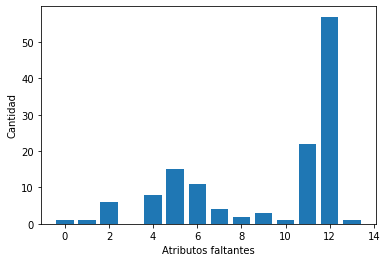

In [31]:

faltantes_df = faltantes_df.sort_values('cantidad', ascending=True)

df_fl_c = faltantes_df.loc[(faltantes_df['cantidad'] > 0)]

plt.bar(df_fl_c["columna"], df_fl_c["cantidad"])
plt.ylabel('Cantidad')
plt.xlabel('Columnas')
plt.show()     